# Emerging Technology - Task Assessments
The author is Anthony Moore (G00170900@gmit.ie)

## Task 1
This my proposed solution to the given assessment. The objective is to calculate the $\sqrt{2}$ to within 100 decimal places. The code provided should not depend on any code from the standard library or otherwise, with the exception of validating the results for comparison.

***

#### Task: Calculate the square root of 2 to 100 decimal places.
We can calculate the square root of a number using Newtons Method [1,2] to find the square root of $z$ of a number $x$, we can iterate using the following formula.

$$ z_{zext} = z - \frac{z^2 -x} {2z} $$


In [1]:
def sqrtNum(x):
    """
    A function to calculate the square root of a number x
    """
    # Initial estimate for the square root of z
    z = x / 2
    # loop until we are happy with the level of precision
    while abs(x - (z * z)) > 0.00000001:
        # calculate a better guess for the square root value on the next iteration
        z -= (z * z - x) / (2 * z)
    # return the (approximate) square root of x
    return z


In [2]:
# Test the function on 100
sqrtNum(100)

10.000000000107446

In [3]:
# Test the function on 2
sqrtNum(2)

1.4142135623746899

In [4]:
# Use math library to validate our result
import math
math.sqrt(2)

1.4142135623730951

#### Enhancements
Building upon our basic algorithm we must now investigate how to achieve an accurate result to within 100 decimal places. The first milestone, we must overcome is the limitation of how a programming languages typically handle floating point numbers. In most languages floats are typically 32-bits in size with a precision of 24-bits which equates to 7 decimal places. Doubles are typically 64-bits in size with a precession of 53-bits which equates to 16 decimal places [3,4]

One approach to this solution could potentially be to try and represent the value as a string. Since a string is essentially a character array with no maximum limit. Its only real limitation running on a 64-bit operating system would be the amount of random access memory (RAM) that is physically installed on the machine.

In [5]:
# Attempt to calculate to 100 decimal places using string format
result = format(sqrtNum(2),',.100f')
print(result)

1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


#### Observation
It would seem that using a string did generate 100 decimal places. However, it appears to have stopped calculating after 53 decimal digits. This would also seem to confirm how floating point numbers are stored on modern computers as binary fractions, as per the python documentation[4]. 

> On most machines today, floats are approximated using a binary fraction with the numerator using the first 53 bits starting with the most significant bit and with the denominator as a power of two. In the case of 1/10, the binary fraction is 3602879701896397 / 2 ** 55 which is close to but not exactly equal to the true value of 1/10.


#### Enhancements 
Given the limitations of floating-point numbers and my plan to use a string coming up short. I started to think of other ways to hold large numerical values. The obvious one that can to mind was an integer as this could hold 2^64. Initially I felt that this would be a limitation and that I would probably need to import the math library to unbind this figure. However, this is a built in feature with the Python3 standard library [5].

I then looked into how to create very large integer values (unbounded) by using the exponentiation operator $**$ and dividing into whole numbers using the floored quotient operator $//$ to avoid returning any floating point numbers [6].

To format the large integer back into a float with 100 decimal places. I first converted the integer into a list, then inserted a decimal place after the first digit. I Then converted the list back into a formatted string and printed the result [7].

In [6]:
def sqrt2():
    """
    A function to calculate the square root of 2 number using large interger values.
    """
    # exponentiation multiplier (makes large int values)
    multiplier = 2 * 10 ** 200

    # level of precision
    precision = 0.0001

    # make x a copy of the large integer
    x = multiplier

    # make an initial guess (divide with floored quotient)
    z =  x // 2

    # loop until we reach the required precision
    while abs((x - z) > precision):
        # calculate a better guess for the square root
        x = (x + z) // 2
        z = multiplier // x
    
    # using list comprehension 
    # convert whole number to list of integers 
    listResults = [int(elem) for elem in str(x)] 

    # insert decimal point after the first digit in the list
    listResults.insert(1, '.')
    
    # using list comprehension 
    # convert list back to a string 
    listToStr = ''.join([str(elem) for elem in listResults])

    # return result
    return (listToStr)

In [7]:
# test sqrt2 function
print(sqrt2())

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [8]:
# import Decimal library to validate result
from decimal import *
getcontext().prec=101
print(Decimal("2").sqrt())

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Conclusion
Using a combination of large integer values along with list compression. We have been able to accurately calculate the
$\sqrt{2}$ to within 100 decimal places.

#### Task 1 - References
[1] A Tour of Go - Exercise: Loops and Functions https://tour.golang.org/flowcontrol/8

[2] Wolfram MathWorld - Newton's Method https://mathworld.wolfram.com/NewtonsMethod.html


[3] IEEE 754: floating point in modern computers https://en.wikipedia.org/wiki/Floating-point_arithmetic#IEEE_754:_floating_point_in_modern_computers

[4] Floating Point Arithmetic: Issues and Limitations: https://docs.python.org/3/tutorial/floatingpoint.html

[5] Integers https://docs.python.org/3/whatsnew/3.0.html#integers

[6] Numeric Types https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex

[7] Convert number to list of integers https://www.geeksforgeeks.org/python-convert-number-to-list-of-integers/

***


## Task 2 
This my proposed solution to the given assessment. The Chi-squared test for independence is statistical hypothesis test. It is used to analyse whether two categorical variables are independent. The Wikipedia article on the test for independence gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. The objective is to use scipy.stats and leverage the Chi-squared test for independence, to verify the given statical values and calculate the associated p value

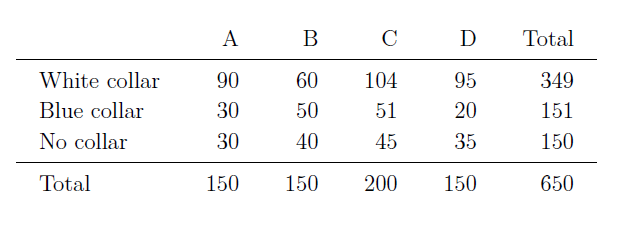

***

#### Task: Verify the Chi-squared value is approx 24.6 and determine the p value
I began by first reading the referenced Wikipedia article to try and build an understanding on what the Chi-squared test for independence was and how to apply it. The chi-squared test for independence is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table [8].

I also had a read over the scipy.stats.chisquare documentation [9] to search for an explanation on how the formula operates.The scipy documentation is both extremely detailed and user friendly. It even came with practical example on how to implement the formula into a solution.

#### Test Code: Ensure the scipy.stats.chisquare library is working correctly

In [9]:
# effecient numerical arrays
import numpy as np
# data frames
import scipy.stats
# chi square library
from scipy.stats import chisquare

# test chisquare for mean of the observed frequencies.
print("Test1: ", chisquare([1, 2, 3, 4, 5]))
# mean of the observed frequencies with expected frequencies
print("Test2: ", chisquare([1, 2, 3, 4, 5], f_exp=[1, 1, 2, 3, 4]))

Test1:  Power_divergenceResult(statistic=3.333333333333333, pvalue=0.5036682742334986)
Test2:  Power_divergenceResult(statistic=2.083333333333333, pvalue=0.7204349163118167)


#### Verify the Chi-squared value

In [10]:
# make a 2d array of observed results
obs = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
# display array shape
print("Array Dimersions: ", obs.shape)
# find chisquare and pValue
chisquare(obs, axis=None)

Array Dimersions:  (3, 4)


Power_divergenceResult(statistic=156.62153846153845, pvalue=6.588067527281063e-28)

#### Observation
My result was clearly way off the expected 24.6 that Wikipedia suggested. This could have potentially meant that the Wikipedia result was incorrect. However, I was rather sceptical and was more inclined to believe that I had made and error somewhere. I quickly glanced over my input parameters to ensure they were correct, and everything seemed to be in order.

I then consulted the scipy documentation to ensure that I had not misinterpreted how the function was supposed be applied. On second inspection, I discovered that perhaps the function I used was not the correct one for this type of categorical data. It would appear that it for was for testing the null hypothesis.

> Calculate a one-way chi-square test.

> The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

Looking through the scipy documentation I came across scipy.stats.chi2_contingency [10]. This seemed to be more in line with the description used in the Wikipedia article [8].It would seem that this version of the function is an application of Pearson's chi-squared test [11].

> Chi-square test of independence of variables in a contingency table.

> This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table [12] observed.



In [11]:
from scipy.stats import chi2_contingency

# make a 2d array of observed results
obs1 = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])
# print results (chi, p ,dof, expected : ndarray)
print(chi2_contingency(obs1))

# format results
result = chi2_contingency(obs1)
print("\nchi-square-value: ", result[0])
print("p-value: ", result[1])


(24.5712028585826, 0.0004098425861096696, 6, array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

chi-square-value:  24.5712028585826
p-value:  0.0004098425861096696


## Conclusion
Using this scipy function I was able to replicate the same results as the Wikipedia article and calculate the associated p value. This would indeed verify that the results on the Wikipedia article are correct.

#### Task 2 - References
[8] Chi-squared test - https://en.wikipedia.org/wiki/Chi-squared_test#Chi-squared_test_for_variance_in_a_normal_population

[9] scipy.stats.chisquare - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

[10] scipy.stats.chi2_contingency - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[11] Pearson's chi-squared test - https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

[12] Contingency Table - https://en.wikipedia.org/wiki/Contingency_table

***


## Task 3
This my proposed solution to the given assessment. The objective is to research the two different implementations of the standard deviation function used by Microsoft excel library and highlight the differences between them. These functions are *STDEV.P* and *STDEV.S* respectively. Then use **NumPy** to perform a simulation demonstrating that the *STDEV.S* calculation is a better estimate for the standard deviation of a population when performed on a sample.

***

#### Task: Use NumPy to demonstrate STDEV.S is a better estimate on a sample population

#### Research
Consulting the Microsoft Excel documentation [13,14], I went to investigate why there is a need for two different formulas for calculating the standard deviation of a population and in what context are they used.

#### STDEV.S

> Estimates standard deviation based on a sample (ignores logical values and text in the sample).

#### STDEV.P

> Calculates standard deviation based on the entire population given as arguments (ignores logical values and text).

On further investigation [15], I was able to establish that *STDEV.P* is to be used for calculating the standard deviation on an entire population. For example: if you had 20 students in a class and all of them had been accounted for.

By extension *STDEV.S* is to be used in instances where only a sample of a larger population has been taken. For example: if you had 20 students in a class, but only obtained data for 12 of them.

Therefore, *STDEV.S* functions as a type of "correction" when the data collected is only a sample of a larger population [16].


### Application of numpy.std() for baseline testing

*numpy.std*(arr, axis = None) : Compute the standard deviation of the given data (array elements) along the specified axis[17].

**Standard Deviation** (SD) is measured as the spread of data distribution in the given data set[18].

In [12]:
# import numpy arrays
import numpy as np

# Python Program illustrating STDEV.P
# using numpy.std() method  
    
# population array n=30
pop = [6, 7, 14, 18, 21, 22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75, 81, 82, 83, 84, 97]

## get std dev  
print("pop : ", pop)  
print("std of pop : ", np.std(pop)) 

pop :  [6, 7, 14, 18, 21, 22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75, 81, 82, 83, 84, 97]
std of pop :  25.181915909812915


In [13]:
# Python Program illustrating STDEV.S
# numpy.std() method  

# Sample array n=20. Remove 5 from the front and 5 from the back (The 20 values in the middle) 
sample = [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75]

## get std dev
print("sample : ", sample)  
print("std of sample : ", np.std(sample, ddof=1))

sample :  [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75]
std of sample :  17.22750249180836


### Application of formula for result validation
#### STDEV.P = *np.sqrt(np.sum((x - np.mean(x))**2)/len(x))* 
#### STDEV.S = *np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))

In [14]:
# formula implementation STDEV.P
# population array

## std dev of pop
print("pop : ", pop)
print("std of pop : ", np.sqrt(np.sum((pop - np.mean(pop))**2)/len(pop)))

pop :  [6, 7, 14, 18, 21, 22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75, 81, 82, 83, 84, 97]
std of pop :  25.181915909812915


In [15]:
# formula implementation STDEV.S
# sample array

## get std dev
print("sample : ", sample)
print("std of sample : ", np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample) -1)))

sample :  [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75]
std of sample :  17.22750249180836


#### Observation
Using the NumPy **np.std()** method and our own formula **np.sqrt(np.sum((x - np.mean(x))^2)/len(x))** we have yielded the same results for both *STDEV.P* and *STDEV.S*. Therefore, we can now be confident that our baseline results are accurate.


### Simulation to prove STDEV.S is a better estimate for the standard deviation when performed on a sample population

Given that we have been able to demonstrate the testing and validation of results using various methods, we can now be confident that the calculations obtained are correct. For the simulation we will perform a *STDEV.P* calculation on a **sample population** of data and compare it to the actual results of the *STDEV.S* calculation.

Technically this is the **incorrect** application of the *STDEV.P* formula. However, this is being done for the purpose of demonstrating that STDEV.S is a more accurate estimate in this situation. As before we will use numpy.std() as the baseline and validate the results with our own formula.

In [16]:
# Python Program illustrating STDEV.P on a sample
# using numpy.std() method  
print("sample : ", sample)
print("std of sample : ", np.std(sample))

sample :  [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75]
std of sample :  16.791292386234005


In [17]:
# formula implementation STDEV.P on a sample
print("sample : ", sample)
print("std of sample : ", np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)))

sample :  [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75]
std of sample :  16.791292386234005


#### Observation
Using the the *STDEV.P* calculation on a sample of population data we were yielded with the result of **16.791292386234005**, which is incorrect based on the previous tests we performed on the same data. Furthermore, the variance between the incorrect application of *STDEV.P* on a sample and the actual *STDEV.P* on a population, was greater than the correct application STDEV.S when used on a sample of population data. The results can be summarised below:

Population : [6, 7, 14, 18, 21, 22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75, 81, 82, 83, 84, 97].

Sample : [22, 23, 25, 29, 31, 36, 38, 40, 43, 48, 53, 54, 60, 61, 62, 64, 65, 67, 73, 75].

Actual STDEV.P = 25.181915909812915

Actual STDEV.S = 17.22750249180836

Incorrect STDEV.P = 16.791292386234005 (Using STDEV.P on a sample)

#### Calculate the Percentage Difference between the results
Difference = (v1 - v2) / ((v1 + v2) / 2) * 100 


In [18]:
# calculate the difference between Actual STDEV.P and Actual STDEV.S
v1 = np.std(pop)
v2 = np.std(sample, ddof=1)
dif = ((v1 - v2) / ((v1 + v2) / 2)) * 100
print("Actual Percentage Difference: ", dif)

Actual Percentage Difference:  37.51248528180932


In [19]:
# calculate the difference between Actual STDEV.P and Incorrect STDEV.P
v1 = np.std(pop)
v2 = np.std(sample)
dif = ((v1 - v2) / ((v1 + v2) / 2)) * 100
print("Incorrect Percentage Difference: ", dif)

Incorrect Percentage Difference:  39.980853807494846


## Conclusion
On the small sample of data that we provided during the tests, the correct application of STDEV.S on a sample was within approx **37.51%** of the actual STDEV.P results from the full population.

However, the incorrect application of *STDEV.P* on a sample was out by approx **39.98%** compared to the actual *STDEV.P* results from the full population.

This would indicate that on the above simulated example *STDEV.S* was more accurate than *STDEV.P* when used on a sample population by approx **2.47%**. 

Using various methods of testing and validation of our baseline data. Then by simulating the incorrect use of *STDEV.P* we have been able to establish that *STDEV.S* is a more accurate estimate for the standard deviation of a population when performed on a sample.

It should also be noted that using very small data sets (less than 5 values) with a high amount of variance can yield some results that contradict our findings. This is due to the STDEV.S formula using **n-1** in the calculation of the standard deviation. Over a very small data set with significant outliers, this can have a large impact on the results[19].

#### Task 3 - References

[13] STDEV.S function - https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[14] STDEV.P function - https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[15] Standard Deviation - https://en.wikipedia.org/wiki/Standard_deviation

[16] Standard Deviation and Variance - https://www.mathsisfun.com/data/standard-deviation.html

[17] Numpy Docs -https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=The%20standard%20deviation%20is%20the,N%20%3D%20len(x)%20.

[18] numpy.std() in Python - https://www.geeksforgeeks.org/numpy-std-in-python/

[19] Reference range determination: the problem of small sample sizes - https://pubmed.ncbi.nlm.nih.gov/1744721/

***


## Task 4 
This my proposed solution to the given assessment. Using **scikit-learn** to apply **k-means** clustering to
**Fisher’s Iris data set**. Explain how the program works and how accurate it might
be. Then explain how your model could be used to make predictions of species of iris.

***

#### Task: Use k-means clustering to predict species of iris

#### Fisher's Iris Data Set
Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper[20].

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Four features are measured from each sample: 
1. sepal_length
2. sepal_width
3. petal_length
4. petal_width

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. This data set became a typical test case for many statistical classification techniques in machine learning.


In [20]:
# numerical arrays
import numpy as np
# machine learning
import sklearn.cluster as skcl
# 3d grahps
from mpl_toolkits.mplot3d import Axes3D
# plotting tool
import matplotlib.pyplot as plt
# convert .csv to numpy array
from numpy import genfromtxt

In [21]:
# Fishers iris data set
iris_data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0,1,2,3), skip_header=1)

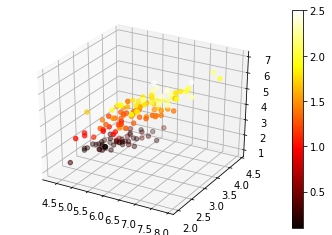

In [22]:
# https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    
# create 4d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot iris data
img = ax.scatter(iris_data[:,0], iris_data[:,1], iris_data[:,2], c=iris_data[:,3], cmap=plt.hot())
fig.colorbar(img)
plt.show()

#### Observation
Representing all four parameters in 4 dimensions is achieved by representing data with first three variables on the axis and the fourth being colour:
- x = sepal_length
- y = sepal_width
- z =  petal_length
- colour heatmap = petal_width

While this does a nice job at giving a visual representation of the **Iris data set** in 4 dimensions. We will not be able to represent the *petal_width* as a colour since we will be using **k-means** to group clusters together by colour.

We could use size or alpha to represent the *petal_width* instead of colour. However, it does make the data difficult to see especially in the case of the **setosa** as they have very small petals compared to the other species of Iris. Representing the data in 3 dimensions is still adequate for illustrative purposes.


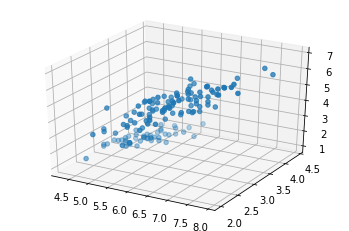

In [23]:
# make a 3d plot from the iris data
# create 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot iris data
img = ax.scatter(iris_data[:,0], iris_data[:,1], iris_data[:,2])
plt.show()

#### KMeans Clustering
The KMeans algorithm clusters data by trying to separate samples in **n-groups** of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster[21,22]. Inertia can be recognized as a measure of how internally coherent clusters are.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
 $$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$


#### Application of scikit-learn

> **KMeans** *(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')*  
K-Means clustering.

**n_clusters : int, default=8**  
The number of clusters to form as well as the number of centroids to generate.

**random_state : int, RandomState instance, default=None**  
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

> **fit** *(X, y=None, sample_weight=None)*  
Compute k-means clustering.

**X : {array-like, sparse matrix} of shape (n_samples, n_features)**  
Training instances to cluster. 

In [24]:
# perform kmeans fitting
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(iris_data)

In [25]:
# display cluster labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Observation
All 150 samples have been processed and given a label appropriate to their respective cluster. This has been achieved by setting **n_clusters=3** given that we knew there are 3 distinct species of Iris in the data set (setosa, virginica, versicolor). The individual samples are labelled based on the proximity of the nearest cluster CenterPoint.

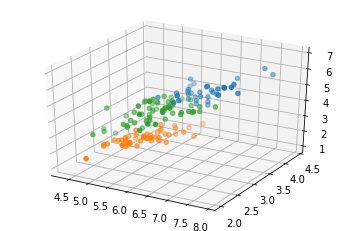

In [26]:
# make a 3d plot from the iris data grouped by kmeans label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot iris data using KMeans labels
img = ax.scatter(iris_data[kmeans.labels_ == 0][:,0], iris_data[kmeans.labels_ == 0][:,1], iris_data[kmeans.labels_ == 0][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 1][:,0], iris_data[kmeans.labels_ == 1][:,1], iris_data[kmeans.labels_ == 1][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 2][:,0], iris_data[kmeans.labels_ == 2][:,1], iris_data[kmeans.labels_ == 2][:,2])
plt.show()

#### Cluster Centring
> **cluster_centers_ndarray of shape (n_clusters, n_features)**  
Coordinates of cluster centres.

Using the above method, we can first calculate the cluster centres, then plot these centre points on our graph to help illustrate how the labelling process is achieved.


In [27]:
# calculate center points of the clusters
cent = kmeans.cluster_centers_
cent

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

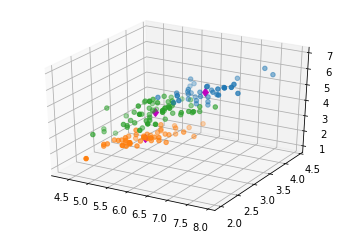

In [28]:
# plot data set with center of clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot iris data using KMeans labels
img = ax.scatter(iris_data[kmeans.labels_ == 0][:,0], iris_data[kmeans.labels_ == 0][:,1], iris_data[kmeans.labels_ == 0][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 1][:,0], iris_data[kmeans.labels_ == 1][:,1], iris_data[kmeans.labels_ == 1][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 2][:,0], iris_data[kmeans.labels_ == 2][:,1], iris_data[kmeans.labels_ == 2][:,2])
# plot cluster center points 'magenta diamond'
plt.plot(cent[:,0], cent[:,1], cent[:,2], 'md')
plt.show()

#### Observation
The cluster centres have been plotted using a Purple diamond. Two of them are clearly visible. However, you almost have to zoom in to see the bottom of the purple diamond that is contained inside the orange cluster. It is barely visible, due to the volume of samples being tightly packed near its origin. Which in theory would be a strong indication that this is indeed the centre of the orange cluster.

#### Add new values and make Predictions
> **predict**(X, sample_weight=None)  
Predict the closest cluster each sample in X belongs to.

**X : {array-like, sparse matrix} of shape (n_samples, n_features)**  
New data to predict.

Using the above method, we will first add new values to an array and then predict which cluster they belong to. Then we can plot these new values on our graph to help illustrate the data. To ensure I do not accidently enter a significant outlier that will taint the results, I have randomly selected a sample from each of the individual Iris species (setosa, virginica, versicolor).


In [29]:
# add three new Iris samples and predict cluster
newVals = np.array([[5.7, 3.8, 1.7, 0.3], [5.9, 3, 4.2, 1.5], [6.4, 3.2, 5.3, 2.3]]) 

# make cluster prediction
predictions = kmeans.predict(newVals)
predictions

array([1, 2, 0])

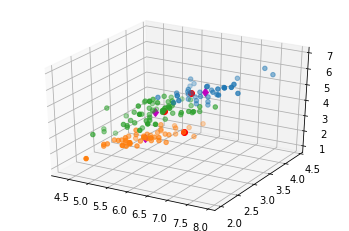

In [30]:
# plot data set with new values (added in the center of clusters)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot iris data using KMeans labels
img = ax.scatter(iris_data[kmeans.labels_ == 0][:,0], iris_data[kmeans.labels_ == 0][:,1], iris_data[kmeans.labels_ == 0][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 1][:,0], iris_data[kmeans.labels_ == 1][:,1], iris_data[kmeans.labels_ == 1][:,2])
img = ax.scatter(iris_data[kmeans.labels_ == 2][:,0], iris_data[kmeans.labels_ == 2][:,1], iris_data[kmeans.labels_ == 2][:,2])
# plot center points 'magenta diamond'
plt.plot(cent[:,0], cent[:,1], cent[:,2], 'md')
# plot new values 'red circle'
plt.plot(newVals[:,0], newVals[:,1], newVals[:,2],'ro')
plt.show()

#### Observation
The three new samples can be seen by the red circles added to our graph. They were each predicted based on the proximity of which ever cluster they were closest to. The three centre clusters indicated by purple diamonds are also included for reference. The three samples were assigned to the clusters (1, 2, 0) respectively. This is indeed correct as I had selected a random sample from each individual species of Iris.

## Conclusion
This model would seem to exhibit good prediction capabilities when given a large number of samples to build a model. One caveat to consider is that the algorithm requires the number of clusters to be specified. So, if we took a sample of raw data and did not know the correct number of cluster groups, the results will vary depending on the estimate provided.

The prediction model may also run into issues if the sample size is very small and there is a large coefficient of variation between them. Since outliers will have a major impact on small sample sizes, the results will most likely be inaccurate. 

Best practice would be to collect a large amount of data from a wide range of sources to remove sample bias. This should then be processed so the correct number of cluster groups can be pre-established. When attempting to predict new samples the data provided should be realistic and consistent. You could randomly generate numbers to make test data, once you do it within certain parameters that reflect actual values.

#### Task 4 - References

[20] The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis -  https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x

[21] K-means - https://scikit-learn.org/stable/modules/clustering.html#k-means

[22] sklearn.cluster.KMeans - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

***
